In [1]:
# Building a Simple Ham/Spam Classifier Using Enron Emails: Logistic Regression and XGBoost

In [28]:
import os
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

In [29]:
!unzip emails.zip

Archive:  emails.zip
   creating: ham/
  inflating: ham/00001.7c53336b37003a9286aba55d2945844c  
  inflating: ham/00002.9c4069e25e1ef370c078db7ee85ff9ac  
  inflating: ham/00003.860e3c3cee1b42ead714c5c874fe25f7  
  inflating: ham/00004.864220c5b6930b209cc287c361c99af1  
  inflating: ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613  
  inflating: ham/00006.253ea2f9a9cc36fa0b1129b04b806608  
  inflating: ham/00007.37a8af848caae585af4fe35779656d55  
  inflating: ham/00008.5891548d921601906337dcf1ed8543cb  
  inflating: ham/00009.371eca25b0169ce5cb4f71d3e07b9e2d  
  inflating: ham/00010.145d22c053c1a0c410242e46c01635b3  
  inflating: ham/00011.fbcde1b4833bdbaaf0ced723edd6e355  
  inflating: ham/00012.48a387bc38d1316a6f6b49e8c2e43a03  
  inflating: ham/00013.81c34741dbed59c6dde50777e27e7ea3  
  inflating: ham/00014.cb20e10b2bfcb8210a1c310798532a57  
  inflating: ham/00015.4d7026347ba7478c9db04c70913e68fd  
  inflating: ham/00016.ef397cef16f8041242e3b6560e168053  
  inflating: ham/00017.08ef2d89f1

In [30]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

In [31]:
data = []
labels = []

for root, dirs, files in os.walk('ham'):
    for file in files:
        with open(os.path.join(root, file), 'r', errors='ignore') as f:
            content = f.read()
            content = clean_text(content)
            data.append(content)
            labels.append(0)

for root, dirs, files in os.walk('spam'):
    for file in files:
        with open(os.path.join(root, file), 'r', errors='ignore') as f:
            content = f.read()
            content = clean_text(content)
            data.append(content)
            labels.append(1)

df = pd.DataFrame({'email': data, 'label': labels})

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=42)

In [33]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [35]:
y_pred = logreg.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.985
Confusion Matrix:
[[504   1]
 [  8  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       505
           1       0.99      0.92      0.95        95

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.98      0.98       600



In [36]:
# XGBoost Model
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred_xgb = xgb_clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.995
Confusion Matrix:
[[503   2]
 [  1  94]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       505
           1       0.98      0.99      0.98        95

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       1.00      0.99      1.00       600



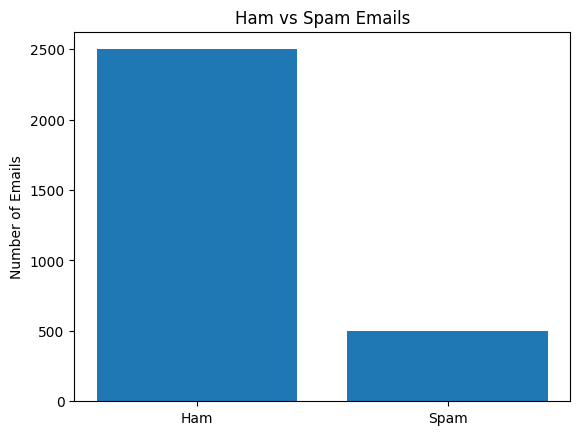

In [39]:
import matplotlib.pyplot as plt

# Count the number of ham and spam emails
ham_count = df[df['label'] == 0].shape[0]
spam_count = df[df['label'] == 1].shape[0]

# Create a bar chart
plt.bar(['Ham', 'Spam'], [ham_count, spam_count])
plt.ylabel('Number of Emails')
plt.title('Ham vs Spam Emails')
plt.show()

In [42]:
!pip install wordcloud

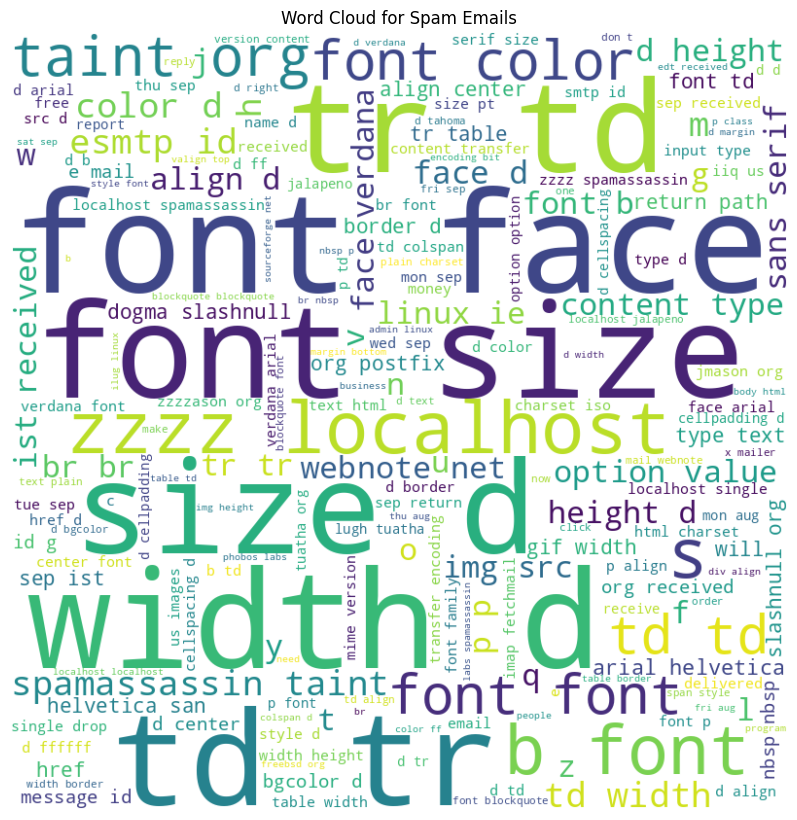

In [44]:
from wordcloud import WordCloud, STOPWORDS # import STOPWORDS
import matplotlib.pyplot as plt

# Concatenate all spam email content into a single string
spam_text = ' '.join(df[df['label'] == 1]['email'])

# Generate a word cloud
stop_words = set(STOPWORDS) # assign STOPWORDS to stop_words
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words).generate(spam_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.tight_layout(pad=0)
plt.show()